<a href="https://colab.research.google.com/github/roshanikhandelwal/Stock-Market-Prediction-/blob/main/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using Numerical and Textual Analysis

## Numerical Data Analysis

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving CSV (1).csv to CSV (1).csv


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving india-news-headlines.csv to india-news-headlines (1).csv


In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
import joblib
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
ps = PorterStemmer()
import xgboost 
import lightgbm 
import re

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# We will analyze the stock price data of BSE Sensex of the last 10 years.

df = pd.read_csv("CSV (1).csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-02-08,3.78,3.81,3.75,3.80,3.429847,5300
1,2010-02-09,3.75,3.83,3.56,3.79,3.420820,8900
2,2010-02-10,3.79,3.79,3.79,3.79,3.420820,0
3,2010-02-11,3.78,3.82,3.77,3.82,3.447898,1900
4,2010-02-12,3.81,3.81,3.77,3.77,3.402768,2400


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2764,2021-02-01,33.410000,33.619999,33.110001,33.279999,33.184914,56100
2765,2021-02-02,33.660000,34.130001,33.380001,34.119999,34.022514,54700
2766,2021-02-03,34.130001,34.349998,33.720001,33.980000,33.882915,85300
2767,2021-02-04,34.080002,35.240002,34.020000,35.000000,34.900002,59400
2768,2021-02-05,35.259998,35.270000,34.740002,35.110001,35.110001,49400


In [ ]:
#Converting Date column to datetime datatype

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2769 non-null   datetime64[ns]
 1   Open       2769 non-null   float64       
 2   High       2769 non-null   float64       
 3   Low        2769 non-null   float64       
 4   Close      2769 non-null   float64       
 5   Adj Close  2769 non-null   float64       
 6   Volume     2769 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 151.6 KB


In [ ]:
df.set_index('Date',inplace=True,drop=False)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-02-08,2010-02-08,3.78,3.81,3.75,3.80,3.429847,5300
2010-02-09,2010-02-09,3.75,3.83,3.56,3.79,3.420820,8900
2010-02-10,2010-02-10,3.79,3.79,3.79,3.79,3.420820,0
2010-02-11,2010-02-11,3.78,3.82,3.77,3.82,3.447898,1900
2010-02-12,2010-02-12,3.81,3.81,3.77,3.77,3.402768,2400


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2.769000e+03
mean,17.901380,18.138068,17.669715,17.904160,17.016074,9.178985e+04
std,7.779653,7.856339,7.707631,7.778302,7.580791,9.831284e+04
min,3.750000,3.790000,3.560000,3.770000,3.402768,0.000000e+00
25%,10.850000,10.980000,10.620000,10.850000,10.047865,3.990000e+04
50%,19.600000,19.850000,19.330000,19.570000,18.809221,6.960000e+04
75%,24.000000,24.309999,23.709999,24.030001,22.815971,1.144000e+05
max,35.509998,36.119999,35.240002,35.980000,35.877201,2.073400e+06


### Using ARIMA Data Analysis
#### ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. 




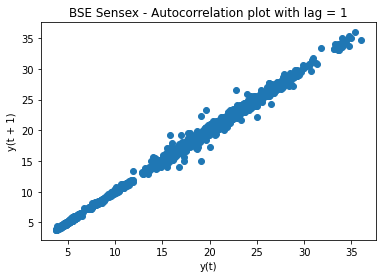

In [ ]:
## Checking for Cross-correlation

plt.figure()
lag_plot(df['Close'], lag=1)
plt.title('BSE Sensex - Autocorrelation plot with lag = 1')
plt.show()

##### There is an auto correlation for lag=1 (i.e the data of current day is correlated to previous 1 days' data)

### Visualizing Plot

Text(0.5, 0, 'Year')

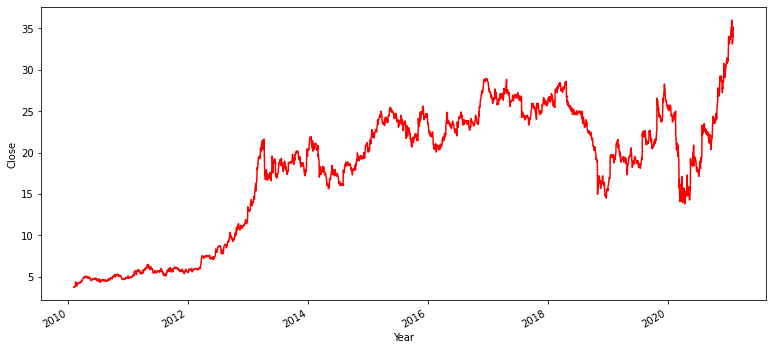

In [ ]:
plt.figure(figsize=(13, 6))
df['Close'].plot(color = 'red')
plt.ylabel('Close')
plt.xlabel('Year')

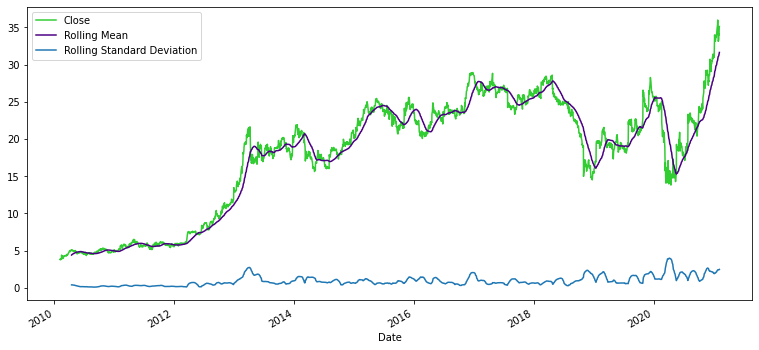

In [ ]:
#Plotting moving average
close = df['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(13, 6))
df['Close'].plot(color = 'limegreen', label = 'Close')
ma.plot(color = 'indigo', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

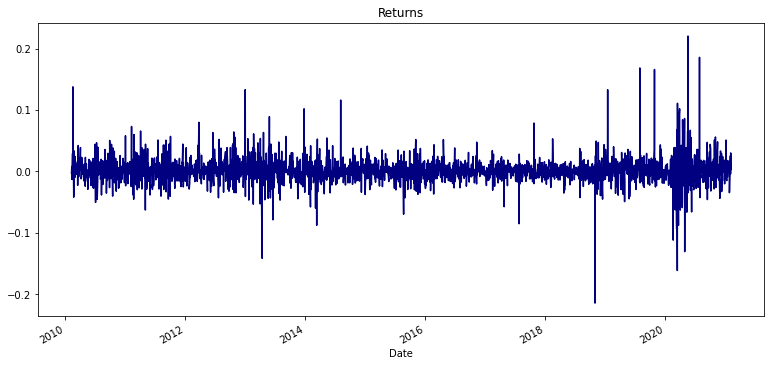

In [ ]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (13,6))
returns.plot(label='Return', color = 'navy')
plt.title("Returns")

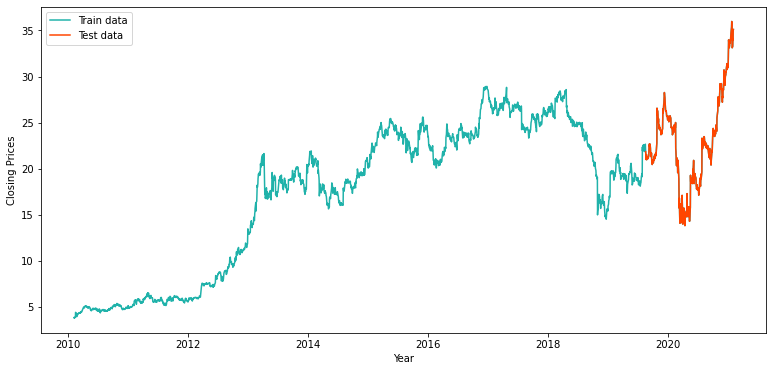

In [ ]:
#splitting data into test and train set

#train_data, test_data = df[:int(len(df)*0.9)], df[int(len(df)*0.9):]
train_data, test_data = df[:2400], df[2400:]
plt.figure(figsize=(13,6))
plt.grid(False)
#plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Close'], 'lightseagreen', label='Train data')
plt.plot(test_data['Close'], 'orangered', label='Test data')
plt.legend()

In [ ]:
# The auto_arima function seeks to identify the 
# most optimal parameters for an ARIMA model, and returns a fitted ARIMA model. 

model_autoARIMA = auto_arima(train_data['Close'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1344.510, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1344.279, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1343.215, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1343.135, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1343.657, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1344.747, Time=1.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1346.747, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1342.624, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1344.076, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1344.276, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1342.697, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1346.276, Time=0.30 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.610 seconds
                               SARIMAX Results                                
Dep. Vari

In [ ]:
# Fitting the ARIMA model

model = ARIMA(train_data['Close'], order=(0,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2399
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -668.567
Method:                       css-mle   S.D. of innovations              0.320
Date:                Thu, 18 Feb 2021   AIC                           1343.135
Time:                        11:06:13   BIC                           1360.483
Sample:                             1   HQIC                          1349.446
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0077      0.006      1.221      0.222      -0.005       0.020
ma.L1.D.Close    -0.0367      0.021     -1.775      0.076      -0.077       0.004
                                    Root

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

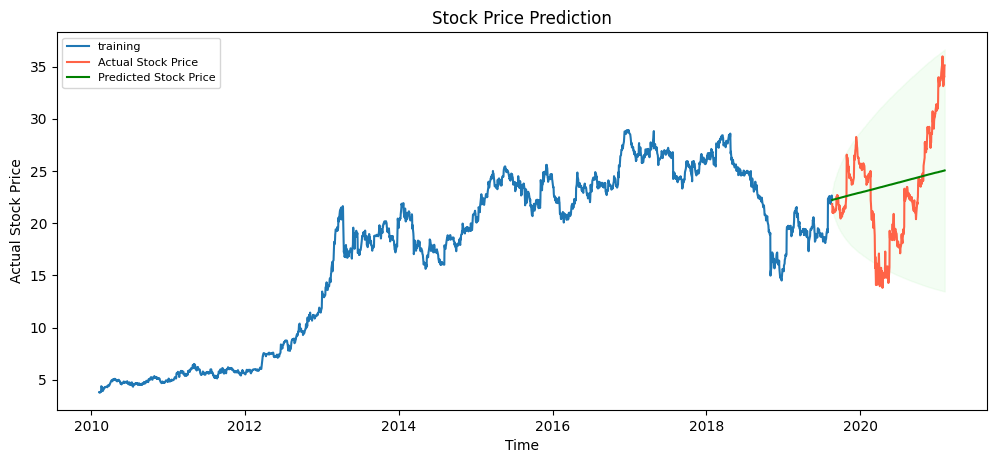

In [ ]:
# Forecast

fc, se, conf = fitted.forecast(369, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['Close'], label='training')
plt.plot(test_data['Close'], color = 'tomato', label='Actual Stock Price')
plt.plot(fc_series, color = 'g',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='lightgreen', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(test_data['Close'], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], fc)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(test_data['Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

MSE: 22.659163167552716
MAE: 3.8388034656426626
RMSE: 4.760164195440396
MAPE: 0.18564278947601137


## Textual Analysis


In [ ]:
cols = ['Date','Category','News']
df_news = pd.read_csv('india-news-headlines (1).csv', names = cols)
df_news

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
...,...,...,...
3297168,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297169,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297170,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297171,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [ ]:
df_news.drop(0, inplace=True)
df_news.drop('Category', axis = 1, inplace=True)
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 75.5+ MB


In [ ]:
 #Converting data type of Date column 
 df_news['Date'] = pd.to_datetime(df_news['Date'],format= '%Y%m%d')
 df_news

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297168,2020-06-30,why tiktok removed 1 65 crore videos in india
3297169,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297170,2020-06-30,kangana ranaut gets a doll version of herself ...
3297171,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [ ]:
#Grouping the headlines for each day
df_news['News'] = df_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,Date,News
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-03,Powerless north India gropes in the dark Think...
3,2001-01-04,The string that pulled Stephen Hawking to Indi...
4,2001-01-05,Light combat craft takes India into club class...
...,...,...
7075,2020-06-26,Containment zone residents slam high prices ch...
7076,2020-06-27,like me i wont let you have a toxic relationsh...
7077,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
7078,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [ ]:
df_news['News']

0       win over cena satisfying but defeating underta...
1       Status quo will not be disturbed at Ayodhya; s...
2       Powerless north India gropes in the dark Think...
3       The string that pulled Stephen Hawking to Indi...
4       Light combat craft takes India into club class...
                              ...                        
7075    Containment zone residents slam high prices ch...
7076    like me i wont let you have a toxic relationsh...
7077    Atanu Ghosh plans to rewrite old scripts to ma...
7078    6 hot and stylish bikini looks of Katrina Kaif...
7079    Detective Byomkesh Bakshy! Edge of Tomorrow Fi...
Name: News, Length: 7080, dtype: object

In [ ]:
#Cleaning headlines
c = []
for i in range(0,len(df_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    c.append(news)

In [ ]:
df_news['News'] = pd.Series(c)
df_news

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,News
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
2,2001-01-03,powerless north india grope dark think laxman ...
3,2001-01-04,string pull stephen hawk india vajpaye give bi...
4,2001-01-05,light combat craft take india club class hawk ...
...,...,...
7075,2020-06-26,contain zone resid slam high price charg veget...
7076,2020-06-27,like wont let toxic relationship food major ra...
7077,2020-06-28,atanu ghosh plan rewrit old script make relev ...
7078,2020-06-29,hot stylish bikini look katrina kaif anna eden...


In [ ]:
#Functions to get the subjectivity and polarity (Sentiment Analysis)
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
#Adding subjectivity and polarity columns
df_news['Subjectivity'] = df_news['News'].apply(getSubjectivity)
df_news['Polarity'] = df_news['News'].apply(getPolarity)
df_news

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000,0.2023,0.234,0.469,0.297
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
...,...,...,...,...,...,...,...,...
7075,2020-06-26,contain zone resid slam high price charg veget...,0.330257,0.066958,-0.9998,0.142,0.789,0.069
7076,2020-06-27,like wont let toxic relationship food major ra...,0.372264,0.064784,-0.9998,0.139,0.790,0.070
7077,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.378165,0.054209,-0.9998,0.136,0.800,0.064
7078,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782,-0.9998,0.130,0.800,0.070


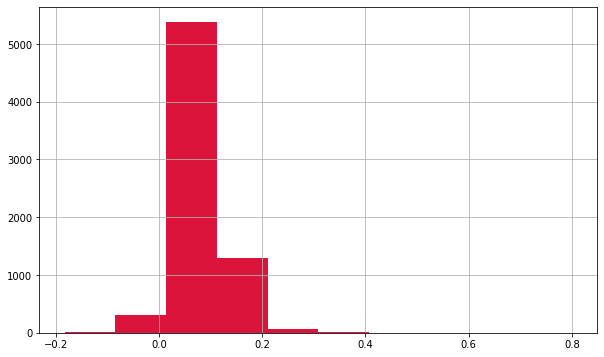

In [ ]:
plt.figure(figsize = (10,6))
df_news['Polarity'].hist(color = 'crimson')

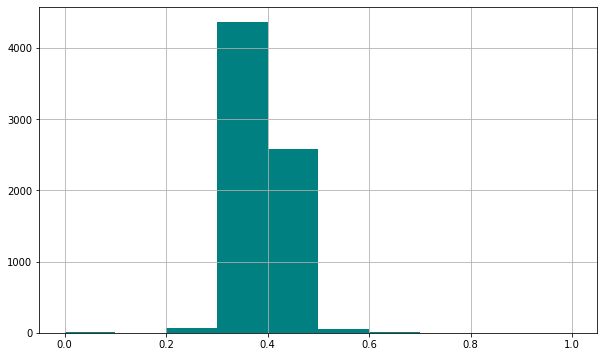

In [ ]:
plt.figure(figsize = (10,6))
df_news['Subjectivity'].hist(color = 'teal')

In [ ]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

df_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['News']]
df_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['News']]
df_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['News']]
df_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['News']]
df_news

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-01,win cena satisfi defeat undertak bigger roman ...,0.450000,0.400000,0.2023,0.234,0.469,0.297
1,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
2,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
3,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
4,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
...,...,...,...,...,...,...,...,...
7075,2020-06-26,contain zone resid slam high price charg veget...,0.330257,0.066958,-0.9998,0.142,0.789,0.069
7076,2020-06-27,like wont let toxic relationship food major ra...,0.372264,0.064784,-0.9998,0.139,0.790,0.070
7077,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.378165,0.054209,-0.9998,0.136,0.800,0.064
7078,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782,-0.9998,0.130,0.800,0.070


In [ ]:
df_merge = pd.merge(df_news, df.rename_axis(None)[['Date',	'Open',	'High',	'Low',	'Close',	'Adj Close',	'Volume']], 
          on='Date', how = 'inner')
df_merge

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Open,High,Low,Close,Adj Close,Volume
0,2010-02-08,formula one lucki girl aditi kannan debut reme...,0.404111,0.048291,-0.9976,0.143,0.742,0.115,3.780000,3.810000,3.750000,3.800000,3.429847,5300
1,2010-02-09,deepika shahid coupl katrina make bhojpuri deb...,0.360548,0.003497,-0.9997,0.171,0.759,0.070,3.750000,3.830000,3.560000,3.790000,3.420820,8900
2,2010-02-10,menspeak women eat less truli sexi high drama ...,0.388132,0.083317,-0.9996,0.163,0.754,0.083,3.790000,3.790000,3.790000,3.790000,3.420820,0
3,2010-02-11,aamir spend time mom katrina unwel name khan a...,0.370334,0.112398,-0.9918,0.121,0.773,0.106,3.780000,3.820000,3.770000,3.820000,3.447898,1900
4,2010-02-12,yoga togeth stay love forev kat si porn video ...,0.439323,0.121797,-0.9956,0.140,0.743,0.116,3.810000,3.810000,3.770000,3.770000,3.402768,2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,2020-06-24,never thought voic today vidya rajput never th...,0.368654,0.077799,-0.9997,0.126,0.807,0.067,18.480000,18.540001,18.080000,18.110001,17.923376,160700
2613,2020-06-25,truck firm look new export market sell bs rang...,0.362784,0.011935,-0.9999,0.153,0.795,0.052,18.059999,18.059999,17.670000,18.020000,17.834303,127300
2614,2020-06-26,contain zone resid slam high price charg veget...,0.330257,0.066958,-0.9998,0.142,0.789,0.069,17.799999,17.900000,17.430000,17.770000,17.586880,229100
2615,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782,-0.9998,0.130,0.800,0.070,18.010000,18.450001,17.809999,18.250000,18.061934,140300


In [ ]:
df2 = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df2

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,3.800000,0.404111,0.048291,-0.9976,0.143,0.742,0.115
1,3.790000,0.360548,0.003497,-0.9997,0.171,0.759,0.070
2,3.790000,0.388132,0.083317,-0.9996,0.163,0.754,0.083
3,3.820000,0.370334,0.112398,-0.9918,0.121,0.773,0.106
4,3.770000,0.439323,0.121797,-0.9956,0.140,0.743,0.116
...,...,...,...,...,...,...,...
2612,18.110001,0.368654,0.077799,-0.9997,0.126,0.807,0.067
2613,18.020000,0.362784,0.011935,-0.9999,0.153,0.795,0.052
2614,17.770000,0.330257,0.066958,-0.9998,0.142,0.789,0.069
2615,18.250000,0.373210,0.060782,-0.9998,0.130,0.800,0.070


In [ ]:
# Rescaling variables in the range [0,1] using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df2))
new_df.columns = df2.columns
new_df.index = df2.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.001192,0.340409,0.191628,0.001200,0.452381,0.318182,0.650485
1,0.000795,0.198405,0.093275,0.000150,0.674603,0.428571,0.213592
2,0.000795,0.288319,0.268532,0.000200,0.611111,0.396104,0.339806
3,0.001987,0.230302,0.332384,0.004101,0.277778,0.519481,0.563107
4,0.000000,0.455191,0.353021,0.002200,0.428571,0.324675,0.660194


In [ ]:
X = new_df.drop('Close', axis=1)
y = new_df['Close']

In [ ]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.340409,0.191628,0.001200,0.452381,0.318182,0.650485
1,0.198405,0.093275,0.000150,0.674603,0.428571,0.213592
2,0.288319,0.268532,0.000200,0.611111,0.396104,0.339806
3,0.230302,0.332384,0.004101,0.277778,0.519481,0.563107
4,0.455191,0.353021,0.002200,0.428571,0.324675,0.660194


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(2093, 6)

In [ ]:
x_train[:10]

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
477,0.255354,0.284068,0.00095,0.261905,0.590909,0.475728
2360,0.125126,0.325200,0.00010,0.523810,0.500000,0.291262
2196,0.237954,0.311759,0.00005,0.492063,0.487013,0.339806
2476,0.243230,0.308238,0.00005,0.650794,0.383117,0.320388
2298,0.453510,0.407812,0.00010,0.428571,0.590909,0.271845
2367,0.274837,0.213268,0.00015,0.428571,0.551948,0.339806
682,0.344383,0.299050,0.00015,0.341270,0.636364,0.310680
2316,0.429663,0.337214,0.00020,0.380952,0.571429,0.359223
125,0.245036,0.138788,0.00010,0.563492,0.350649,0.466019
905,0.233699,0.222393,0.00010,0.492063,0.428571,0.436893


#### Implementing different regressor models to check which one is the best for sentiment analysis.

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [ ]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.59896396 0.55114348 0.1324841  0.55454291 0.49716083 0.54210253
 0.27983936 0.73182286 0.49911963 0.79134235]
2468    0.806041
667     0.234499
949     0.614865
2227    0.502385
2263    0.635135
1665    0.769078
2403    0.705485
1801    0.899841
351     0.073529
2147    0.780207
Name: Close, dtype: float64
0.060898091125141045


In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [ ]:
print(mean_squared_error(predictions, y_test))

0.07030880546492912


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [ ]:
print(predictions[:10])
print(y_test[:10])
print(mean_squared_error(predictions,y_test))

[0.53895072 0.59578696 0.10651828 0.48847373 0.09340223 0.69157393
 0.07869634 0.83863279 0.97337043 0.81637516]
2468    0.806041
667     0.234499
949     0.614865
2227    0.502385
2263    0.635135
1665    0.769078
2403    0.705485
1801    0.899841
351     0.073529
2147    0.780207
Name: Close, dtype: float64
0.123320818291157


In [ ]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.06057725582545154


In [ ]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

[10:19:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.057480490196012604


#### We conclude that XGB model performs the best for the sentiment analysis.